# Making a chessboard with numpy and matplotlib

In [3]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import random

In [108]:
BOARD_SIZE = 8
WHITE = [1, 1, 1]
BLACK = [0, 0, 0]
RED = [1, 0, 0]
GREEN = [0, 1, 0]
BLUE = [0, 0, 1]

class Board:
    def __init__(self, board_size):
        self.board_size = board_size
        self.grid = np.zeros((board_size,board_size,3))
        self.red_queens = []
        self.blue_queens = []

    def add_color(self, row, col, color):
        cell = self.grid[row, col]
        cell[0] = color[0]
        cell[1] = color[1]
        cell[2] = color[2]

    def render(self):
        plt.imshow(self.grid)

    def make_checkerboard(self, board_size, color):
        for row in range(board_size):
            for column in range(board_size):
                if (column % 2 == 0) and (row % 2 == 0):
                    board.add_color(row, column, color)
                if (column % 2 == 1) and (row % 2 == 1):
                    board.add_color(row, column, color)

    def place_red_queens(self, **kwargs):
        num = 1
        if kwargs.__contains__('num'):
            num = kwargs['num']

        if kwargs.__contains__('random_placement'):
            self.red_queens = [[random.randrange(BOARD_SIZE), random.randrange(BOARD_SIZE), RED] for _ in range(num)]
            return
        if not (kwargs.__contains__('random_placement')):
            self.red_queens = [[kwargs['x'], kwargs['y'], RED] for _ in range(num)]
            return

    def place_blue_queens(self, **kwargs):
        num = 1
        if kwargs.__contains__('num'):
            num = kwargs['num']
        if kwargs.__contains__('random_placement'):
            self.blue_queens = [[random.randrange(BOARD_SIZE), random.randrange(BOARD_SIZE), BLUE] for _ in range(num)]
            return
        if not (kwargs.__contains__('random_placement')):
            self.blue_queens = [[kwargs['x'], kwargs['y'], BLUE] for _ in range(num)]
            return

    def render_queens(self):
        for queen in self.red_queens:
            self.add_color(queen[0], queen[1], queen[2])
        
        for queen in self.blue_queens:
            self.add_color(queen[0], queen[1], queen[2])

    def is_under_attack(self):
        red_y, red_x = [queen[0] for queen in self.red_queens], [queen[1] for queen in self.red_queens]
        blue_y, blue_x = [queen[0] for queen in self.blue_queens], [queen[1] for queen in self.blue_queens]

        for x, y in zip(red_x, red_y):
            for bx, by in zip(blue_x, blue_y):
                if (x-bx == y-by) or (x+y == bx+by) or (x == bx) or (y == by):
                    return True
        return False
        
        



In [109]:
board = Board(BOARD_SIZE)
board.make_checkerboard(BOARD_SIZE, WHITE)
board.place_red_queens(x=1, y=1, num=1)
board.place_blue_queens(x=2, y=2, num=1)
board.render_queens()

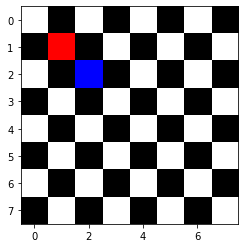

In [110]:
board.render()

In [104]:
board.is_under_attack()

True

[[6, 11, [1, 0, 0]], [15, 14, [1, 0, 0]]]